### Import the necessary libraries for hierarchical and K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import scipy.stats as stats
sns.set_palette('deep')
sns.set(color_codes='True')

# Problem 1: Clustering

## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
#import the dataset and check first 5 records
df = pd.read_csv('bank_marketing_part1_Data.csv')
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


In [5]:
# Check for duplicates
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 0


In [6]:
# Data summary
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


spending  :  ShapiroResult(statistic=0.9325932264328003, pvalue=2.9475659246713803e-08)
advance_payments  :  ShapiroResult(statistic=0.9361613392829895, pvalue=5.901836885868761e-08)
probability_of_full_payment  :  ShapiroResult(statistic=0.9730417132377625, pvalue=0.00046959755127318203)
current_balance  :  ShapiroResult(statistic=0.943798840045929, pvalue=2.8279683306209336e-07)
credit_limit  :  ShapiroResult(statistic=0.960623025894165, pvalue=1.4444454791373573e-05)
min_payment_amt  :  ShapiroResult(statistic=0.9836222529411316, pvalue=0.01543912198394537)
max_spent_in_single_shopping  :  ShapiroResult(statistic=0.9249410033226013, pvalue=7.141085056616703e-09)


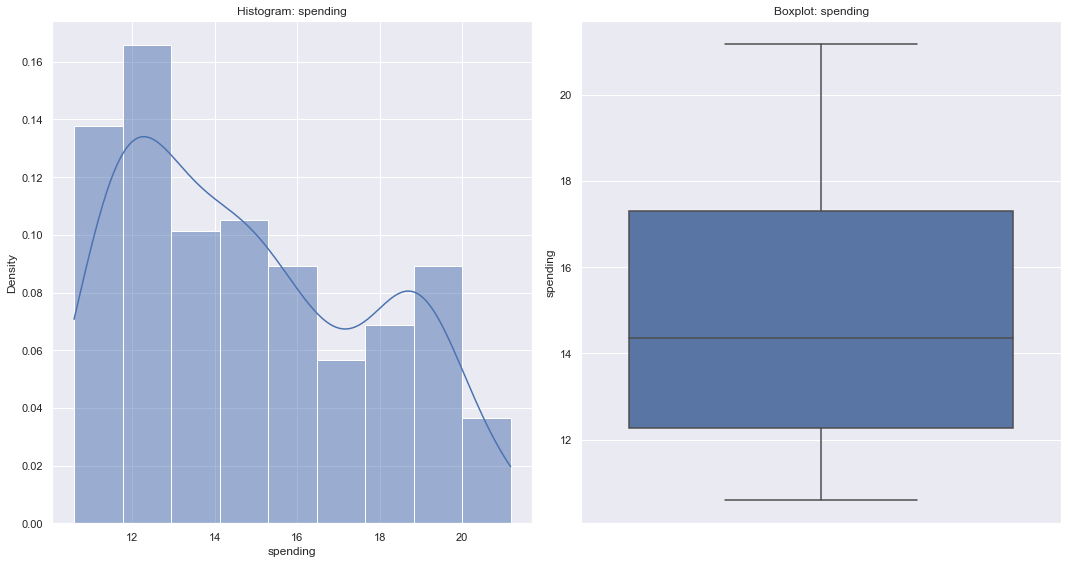

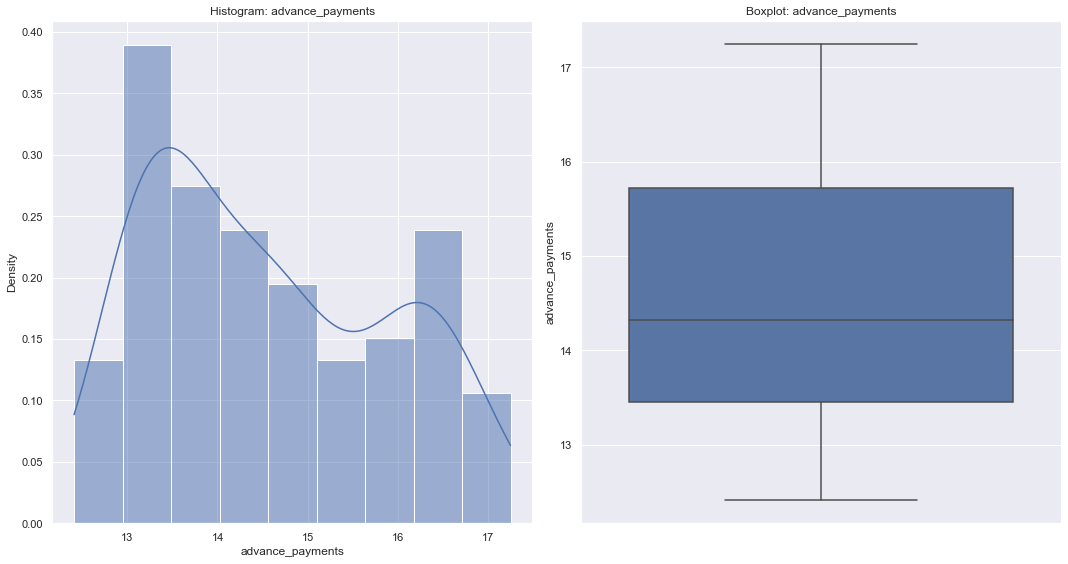

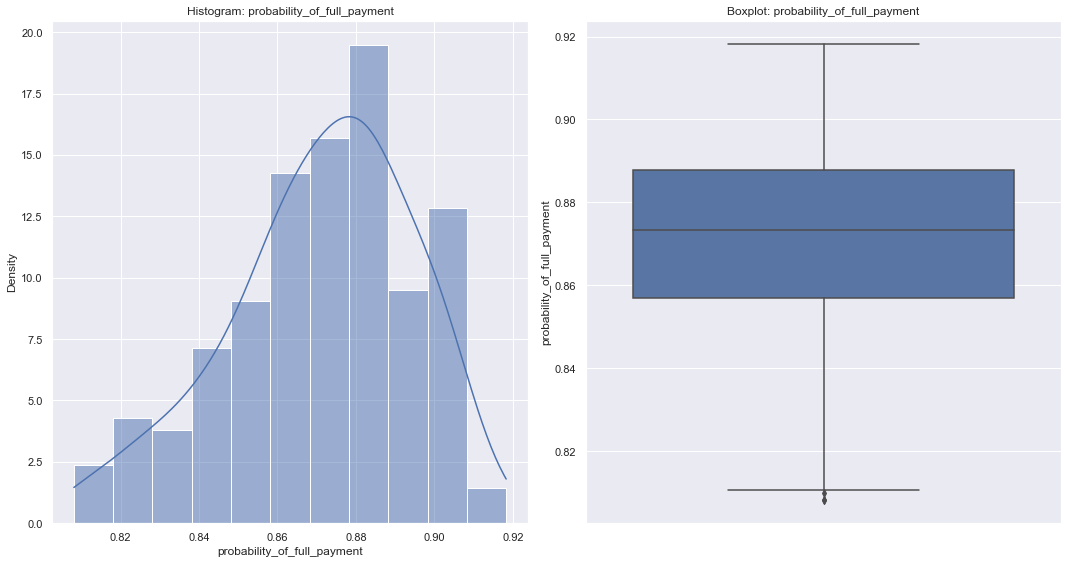

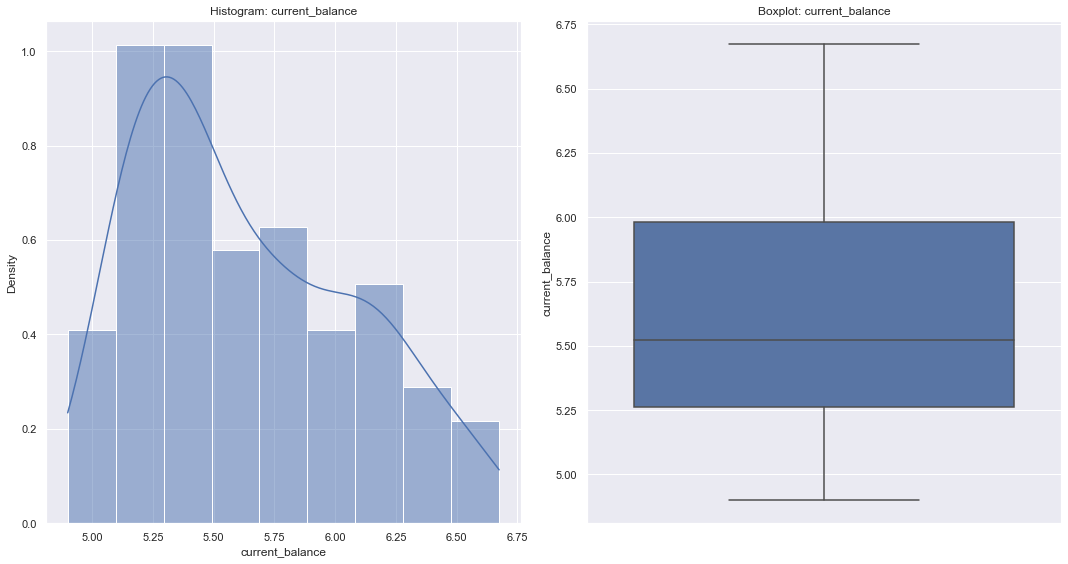

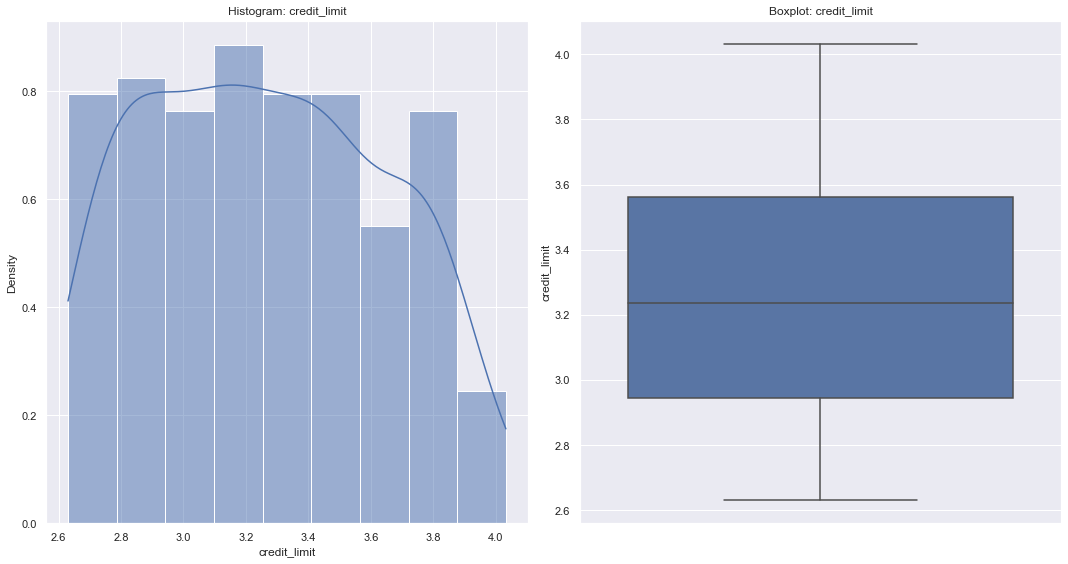

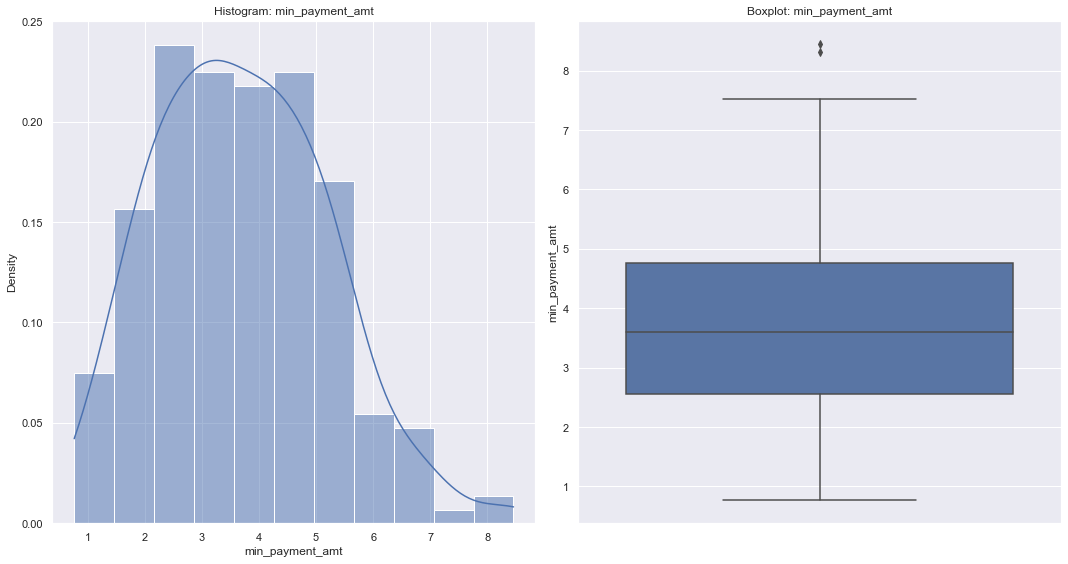

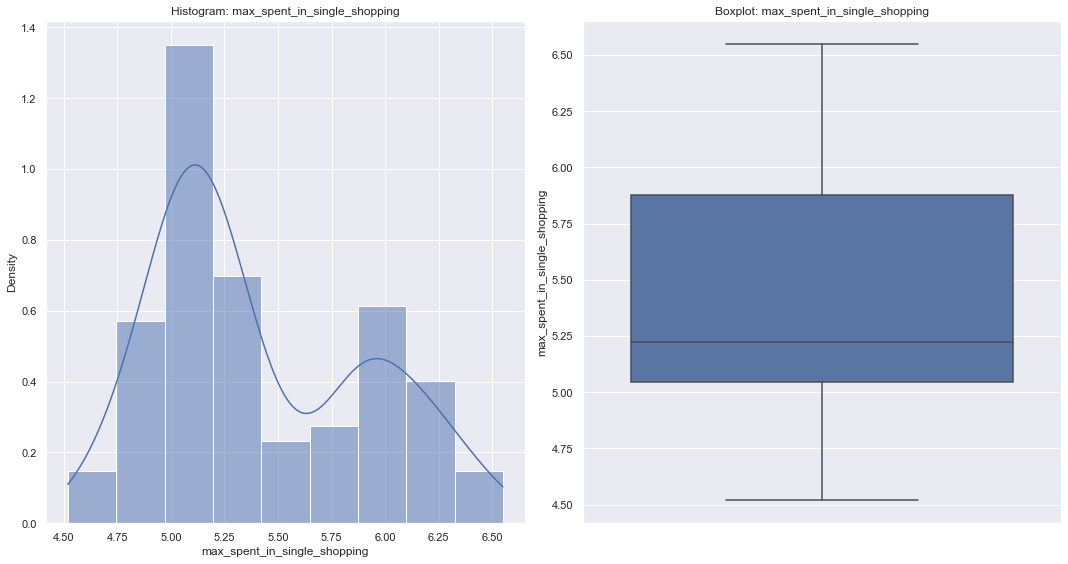

In [7]:
# Check the histogram and boxplot of the 7 varaibles
df_cols = df.columns

for i in range(len(df_cols)):
    plt.figure(figsize = (15,8))
    print(df_cols[i], ' : ', stats.shapiro(df[df_cols[i]]))
    plt.subplot(1,2,1)
    sns.histplot(x=df[df_cols[i]],kde=True,stat='density');
    plt.title('Histogram: {}'.format(df_cols[i]));
    plt.subplot(1,2,2)
    sns.boxplot(y=df_cols[i],data=df)
    plt.title('Boxplot: {}'.format(df_cols[i]))                
    plt.tight_layout();

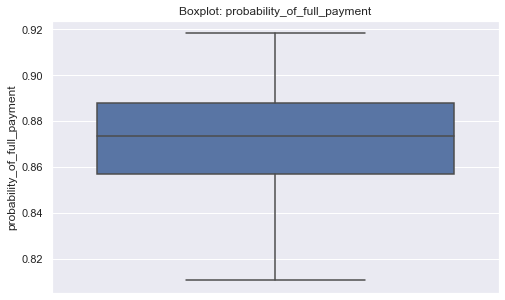

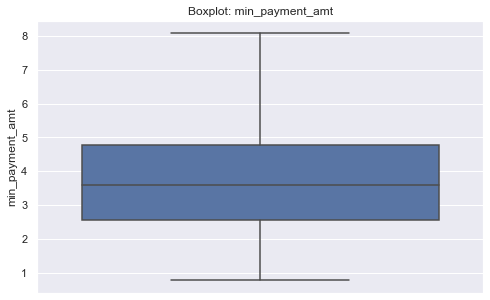

In [8]:
# Outlier treatment

df_out_cols = ['probability_of_full_payment','min_payment_amt']

for i in df_out_cols:
    IQ1 = np.quantile(df[i],0.25)
    IQ3 = np.quantile(df[i],0.75)
    IQR = IQ3 - IQ1
    df[i] = np.where(df[i] < (IQ1 - 1.5 * IQR),(IQ1 - 1.5 * IQR),df[i])
    df[i] = np.where(df[i] > (IQ3 + 1.5 * IQR),(IQ3 + 1.5 * IQR),df[i])
    plt.figure(figsize = (8,5))
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot: {}'.format(i))

In [9]:
# Data summary
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.590000,12.27000,14.35500,17.305000,21.180000
advance_payments,210.0,14.559286,1.305959,12.410000,13.45000,14.32000,15.715000,17.250000
probability_of_full_payment,210.0,0.871025,0.023560,0.810588,0.85690,0.87345,0.887775,0.918300
current_balance,210.0,5.628533,0.443063,4.899000,5.26225,5.52350,5.979750,6.675000
credit_limit,210.0,3.258605,0.377714,2.630000,2.94400,3.23700,3.561750,4.033000
min_payment_amt,210.0,3.697288,1.494689,0.765100,2.56150,3.59900,4.768750,8.079625
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.519000,5.04500,5.22300,5.877000,6.550000


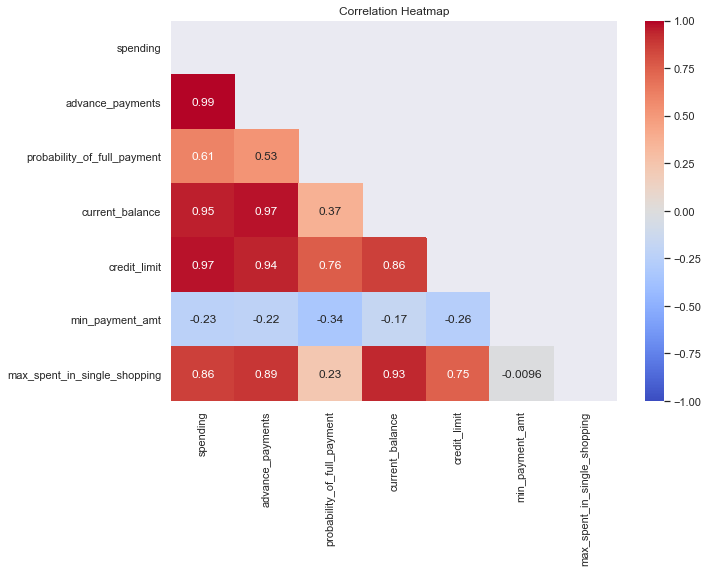

In [10]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

<Figure size 1080x720 with 0 Axes>

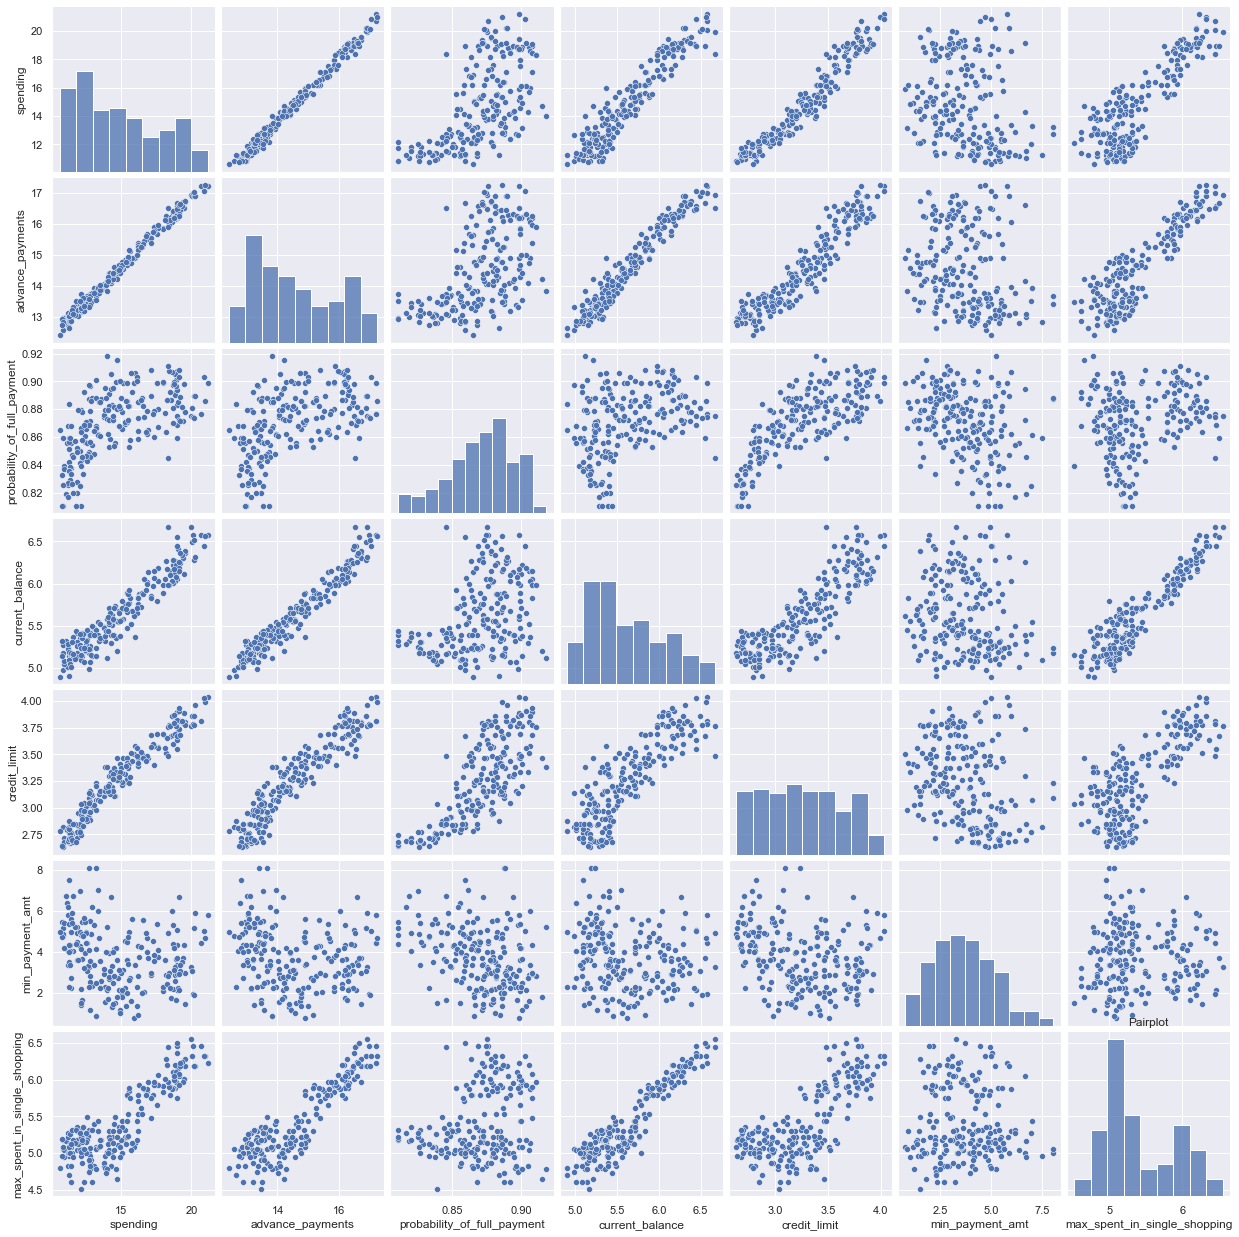

In [11]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.title('Pairplot');

## 1.2 Do you think scaling is necessary for clustering in this case? Justify

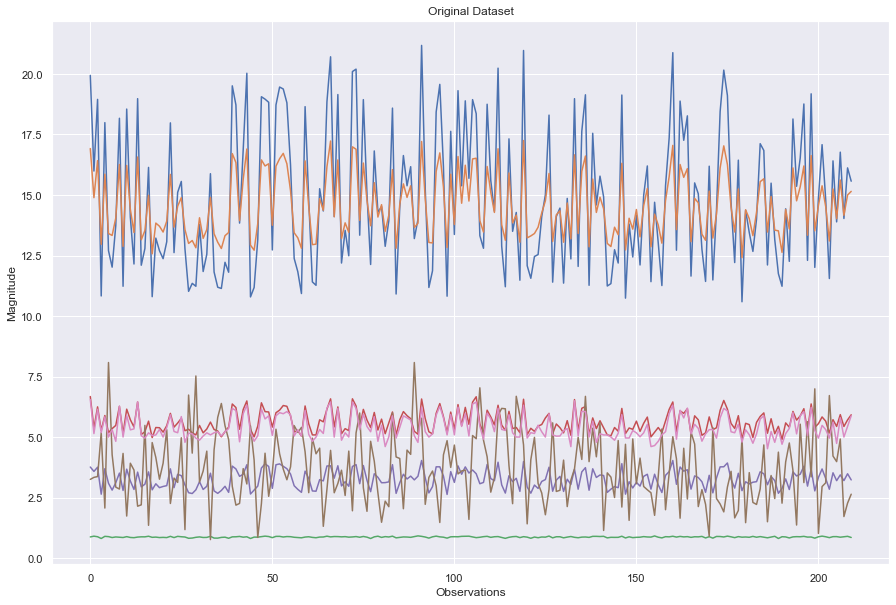

In [12]:
# Plot the entire dataset
plt.figure(figsize=(15,10))
plt.plot(df)
plt.xlabel('Observations')
plt.ylabel('Magnitude')
plt.title('Original Dataset');

In [13]:
# Scaling the dataset
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


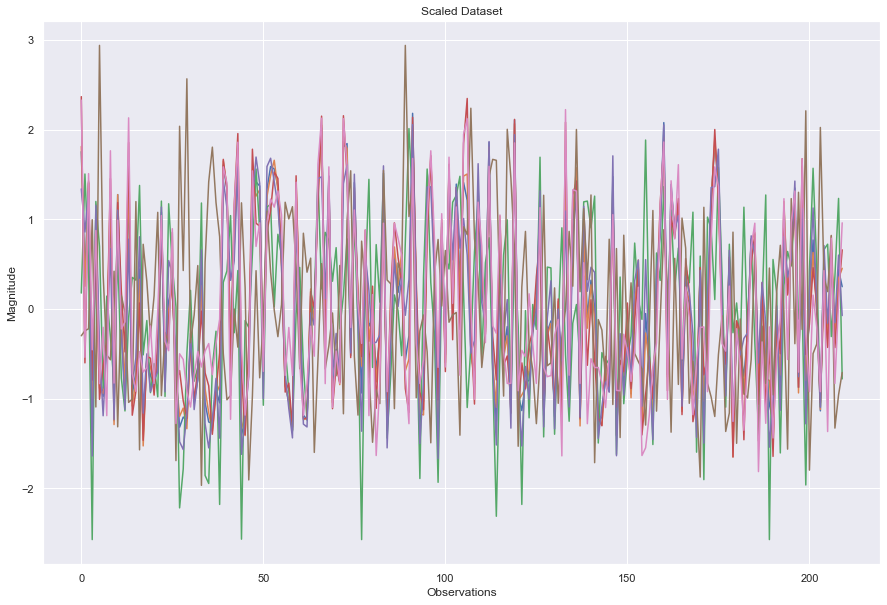

In [14]:
# Plot the scaled dataset
plt.figure(figsize=(15,10))
plt.plot(df_scaled)
plt.xlabel('Observations')
plt.ylabel('Magnitude')
plt.title('Scaled Dataset');

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

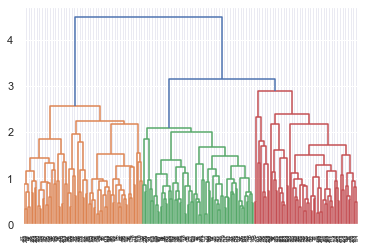

In [15]:
# Lets check with Fcluster and average linkage
link_avg = linkage(df_scaled, method = 'average')
dend = dendrogram(link_avg)

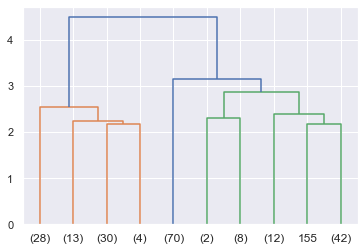

In [16]:
# Cut the dendrogram with p=10
dend=dendrogram(link_avg,truncate_mode='lastp',p=10)

In [17]:
# From the above dendrogram we can see that at distance 3, we can have 3 clusters and at about 2.7 we can have 4 clusters.
# Since we are trying to classify basis on customer spend, a normal level could be High,Medium and Low, which amounts to 3 
# clusters. We will also try to see with 4 clusters and see if any meaningful cluster profile emerges.

In [18]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters= fcluster(link_avg,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [19]:
# Copy clusters as a new column to original dataset
df_fcluster3 = df.copy()
df_fcluster3['fcluster'] = clusters
df_fcluster3.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [20]:
# Lets try to profile the clusters based on means of variables.
fcluster3_profile=df_fcluster3.groupby('fcluster').mean()
fcluster3_profile['Frequency']=df_fcluster3.fcluster.value_counts().sort_index()
fcluster3_profile.T

fcluster,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846845,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.759007
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Frequency,75.000000,70.000000,65.000000


In [21]:
# As guessed, we have 3 clusters with profile as follows:
# - Cluster 1 - High spending customers with higher credit limit and probability of full payments.
# - Cluster 2 - Low spending customers with lowest credit limit and lowest probability of full payment.
# - Cluster 3 - Medium spending customers with mid level credit limit and highest probability of full payment.

In [22]:
# Set criterion as maxclust,then create 4 clusters, and store the result in another object 'clusters'

clusters= fcluster(link_avg,4,criterion='maxclust')
clusters

array([1, 4, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 4, 3, 4, 2, 2, 2, 2, 2,
       1, 2, 4, 1, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 1, 1,
       2, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 2, 2, 1, 4, 1,
       1, 4, 1, 2, 4, 2, 1, 1, 2, 1, 4, 2, 1, 4, 4, 4, 4, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 4, 2, 2, 1, 1, 1, 2, 1, 3, 1, 4, 1, 4, 1, 1, 2, 3, 1,
       1, 4, 1, 2, 2, 1, 4, 3, 2, 1, 4, 2, 2, 2, 4, 4, 1, 2, 4, 4, 2, 4,
       4, 1, 2, 1, 1, 2, 1, 3, 3, 4, 2, 2, 2, 2, 1, 2, 4, 2, 4, 2, 4, 1,
       4, 4, 2, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 4, 4, 2, 4, 2, 4, 1, 1, 1,
       4, 2, 4, 2, 4, 2, 4, 4, 1, 1, 4, 1, 4, 2, 4, 4, 2, 1, 4, 1, 1, 2,
       1, 2, 4, 4, 4, 2, 1, 3, 1, 4, 4, 1], dtype=int32)

In [23]:
# Copy clusters as a new column to original dataset
df_fcluster4 = df.copy()
df_fcluster4['fcluster_4'] = clusters
df_fcluster4.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster_4
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,4
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [24]:
# Lets try to profile the clusters based on means of variables.
fcluster4_profile=df_fcluster4.groupby('fcluster_4').mean()
fcluster4_profile['Frequency']=df_fcluster4.fcluster_4.value_counts().sort_index()
fcluster4_profile.T

fcluster_4,1,2,3,4
spending,18.129200,11.916857,13.739000,14.304000
advance_payments,16.058000,13.291000,13.906000,14.248545
probability_of_full_payment,0.881595,0.846845,0.891750,0.883618
current_balance,6.135747,5.258300,5.310300,5.465945
credit_limit,3.648120,2.846000,3.227800,3.258182
min_payment_amt,3.650200,4.619000,5.686825,2.226676
max_spent_in_single_shopping,5.987040,5.115071,4.945600,5.075564
Frequency,75.000000,70.000000,10.000000,55.000000


In [25]:
# Clusters 1 and 2 retain the same characteristics as that seen above for 3 cluster profiling:
# The medium spending customers seen in fcluster-3 has been divied into 2 clusters
# Cluster 3 - Lower of the medium spending customers, but with highest probability of full payment. They also
#             have the highest min_payment_amt which indicates that the frequency of shopping is low.
# Cluster 4 - Higher of the medium spending customers.

In [26]:
# Lets go with 3 clusters and also arrange the cluster values as 1 - High spending, 2- Medium spending and 3- low spending.
df_fcluster3['fcluster'] = np.where(df_fcluster3['fcluster'] == 2,4,df_fcluster3['fcluster'])
df_fcluster3['fcluster'] = np.where(df_fcluster3['fcluster'] == 3,2,df_fcluster3['fcluster'])
df_fcluster3['fcluster'] = np.where(df_fcluster3['fcluster'] == 4,3,df_fcluster3['fcluster'])
#Lets look at the profile again
# Lets try to profile the clusters based on means of variables.
fcluster3_profile=df_fcluster3.groupby('fcluster').mean()
fcluster3_profile['Frequency']=df_fcluster3.fcluster.value_counts().sort_index()
fcluster3_profile.T

fcluster,1,2,3
spending,18.129200,14.217077,11.916857
advance_payments,16.058000,14.195846,13.291000
probability_of_full_payment,0.881595,0.884869,0.846845
current_balance,6.135747,5.442000,5.258300
credit_limit,3.648120,3.253508,2.846000
min_payment_amt,3.650200,2.759007,4.619000
max_spent_in_single_shopping,5.987040,5.055569,5.115071
Frequency,75.000000,65.000000,70.000000


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [27]:
# We have the scaled dataset df_scaled. Lets run Kmeans for 2 to 10 clusters and check cluster inertia and silhoutte scores
wss = []
silh_score =[]
for i in range(2,11):
    k = KMeans(n_clusters=i)
    kcluster = k.fit(df_scaled)
    wss.append(kcluster.inertia_)
    s_score=silhouette_score(df_scaled,kcluster.labels_)
    silh_score.append(s_score)

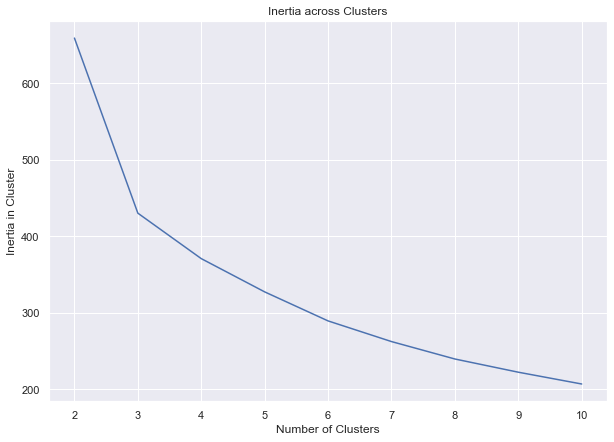

In [28]:
# Lets plot the within sum of squares of centroid or the cluster inertia
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wss);
plt.xlabel("Number of Clusters");
plt.ylabel("Inertia in Cluster");
plt.title("Inertia across Clusters");

[0.46560100442748986,
 0.4008059221522216,
 0.33483949326039913,
 0.27459117428949387,
 0.29061352571270266,
 0.28210629157420875,
 0.2576084933010732,
 0.25998112807795226,
 0.2621810724709731]

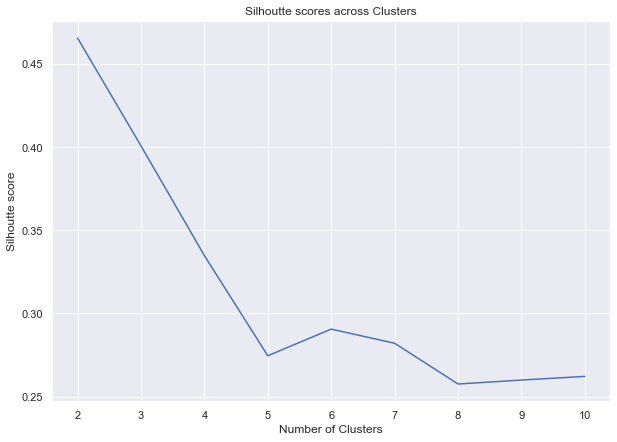

In [29]:
# Lets plot the silhoutte scores of the clusters
plt.figure(figsize=(10,7))
plt.plot(range(2,11),silh_score)
plt.xlabel("Number of Clusters");
plt.ylabel("Silhoutte score");
plt.title("Silhoutte scores across Clusters");
silh_score

In [30]:
#Lets look at the silhoutte score and width of clusters 3,4,5 and 6

for i in range(3,7):
    k_means = KMeans(n_clusters= i)
    cluster = k_means.fit(df_scaled)
    labeli  = cluster.labels_
    sscore = silhouette_score(df_scaled,labeli)
    ssmin = silhouette_samples(df_scaled,labeli).min()
    print ('for {} cluster - sscore :{} , ssmin:{}'.format(i,sscore,ssmin))

for 3 cluster - sscore :0.4008059221522216 , ssmin:0.0027685411286160638
for 4 cluster - sscore :0.33025788407376777 , ssmin:-0.042526891161992444
for 5 cluster - sscore :0.27836628695982346 , ssmin:-0.12024035132064381
for 6 cluster - sscore :0.2861311282164255 , ssmin:-0.1040391937217699


### We can see from above that 3 clusters are optimal for K-Means clustering with high silhoutte score and silhoutte width > 0

In [31]:
k_means = KMeans(n_clusters= 3)
cluster = k_means.fit(df_scaled)
# Copy clusters as a new column to original dataset
df_KMeans = df.copy()
df_KMeans['KMeans_cluster'] = cluster.labels_
df_KMeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMeans_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2


In [32]:
# Lets try to profile the clusters based on means of variables.
KMeans_profile=df_KMeans.groupby('KMeans_cluster').mean()
KMeans_profile['Frequency']=df_KMeans.KMeans_cluster.value_counts().sort_index()
KMeans_profile.T

KMeans_cluster,0,1,2
spending,14.437887,11.856944,18.495373
advance_payments,14.337746,13.247778,16.203433
probability_of_full_payment,0.881597,0.848330,0.884210
current_balance,5.514577,5.231750,6.175687
credit_limit,3.259225,2.849542,3.697537
min_payment_amt,2.707341,4.733892,3.632373
max_spent_in_single_shopping,5.120803,5.101722,6.041701
Frequency,71.000000,72.000000,67.000000


#### As guessed, we have 3 clusters with profile as follows:
#### - Cluster 2 - High spending customers with highest credit limit and probability of full payments.
#### - Cluster 1 - Low spending customers with lowest credit limit and lowest probability of full payment.
#### - Cluster 0 - Medium spending customers with mid level credit limit and high probbility of full payment.

In [33]:
# # Lets re-arrange the cluster values as 1 - High spending, 2- Medium spending and 3- low spending.
df_KMeans['KMeans_cluster'] = np.where(df_KMeans['KMeans_cluster'] == 1,3,df_KMeans['KMeans_cluster'])
df_KMeans['KMeans_cluster'] = np.where(df_KMeans['KMeans_cluster'] == 2,1,df_KMeans['KMeans_cluster'])
df_KMeans['KMeans_cluster'] = np.where(df_KMeans['KMeans_cluster'] == 0,2,df_KMeans['KMeans_cluster'])
#Lets check the profile again
KMeans_profile=df_KMeans.groupby('KMeans_cluster').mean()
KMeans_profile['Frequency']=df_KMeans.KMeans_cluster.value_counts().sort_index()
KMeans_profile.T

KMeans_cluster,1,2,3
spending,18.495373,14.437887,11.856944
advance_payments,16.203433,14.337746,13.247778
probability_of_full_payment,0.884210,0.881597,0.848330
current_balance,6.175687,5.514577,5.231750
credit_limit,3.697537,3.259225,2.849542
min_payment_amt,3.632373,2.707341,4.733892
max_spent_in_single_shopping,6.041701,5.120803,5.101722
Frequency,67.000000,71.000000,72.000000


In [34]:
# Create an output file with all dataset values and additionally the  fcluster and K-Means cluster values.
df['fcluster'] = df_fcluster3['fcluster']
df['KMeans_cluster'] = df_KMeans['KMeans_cluster']
df.to_csv('bank_marketing_cluster.csv',index= False)

In [35]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster,KMeans_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


# Problem 2: CART-RF-ANN

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [36]:
# Load the required libraries to perform CART,Random Forest and ANN
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [37]:
# Load the dataset and check the import
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [38]:
#concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [39]:
# Check for null values
df.isnull().sum().sum()

0

In [40]:
# Check for duplicate record
print ("Number of duplicate records: {}".format(df.duplicated().sum()))
df[df.duplicated(keep=False) == True].sort_values(by=['Age','Duration'])

Number of duplicate records: 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
421,24,EPX,Travel Agency,No,0.0,Online,39,10.0,Cancellation Plan,ASIA
2777,24,EPX,Travel Agency,No,0.0,Online,39,10.0,Cancellation Plan,ASIA
2048,25,C2B,Airlines,No,12.4,Online,1,31.0,Bronze Plan,ASIA
2920,25,C2B,Airlines,No,12.4,Online,1,31.0,Bronze Plan,ASIA
1035,25,C2B,Airlines,No,28.8,Online,17,72.0,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
594,48,C2B,Airlines,Yes,54.0,Online,367,216.0,Silver Plan,ASIA
368,49,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2274,49,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
487,58,EPX,Travel Agency,No,0.0,Online,1,10.0,Cancellation Plan,ASIA


### So we have 139 duplicate records, but since we dont have any customer information, barring age, it could be different customers, hence not dropping the column

In [41]:
# Data Summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Lets calculate range IQR and Quartile min and Quartile max into a dataset
df_desc = df.describe(include='all').T
df_desc['Range'] = df_desc['max'] - df_desc['min']
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc['Qmin'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - 1.5 * df_desc['IQR']))
df_desc['Qmax'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + 1.5 * df_desc['IQR']))
df_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0,76.0,10.0,17.0,57.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21,210.21,17.235,0.0,43.0875
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0,4581.0,52.0,-1.0,141.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0,539.0,49.0,0.0,142.5
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

Age  :  ShapiroResult(statistic=0.8987117409706116, pvalue=1.0706761046520197e-40)
Commision  :  ShapiroResult(statistic=0.6168649792671204, pvalue=0.0)
Duration  :  ShapiroResult(statistic=0.4230910539627075, pvalue=0.0)
Sales  :  ShapiroResult(statistic=0.6869085431098938, pvalue=0.0)


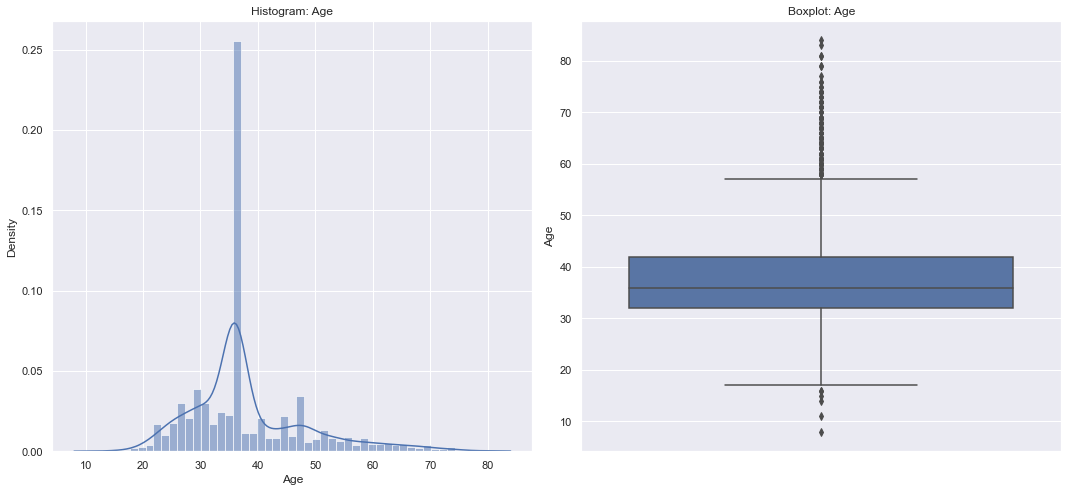

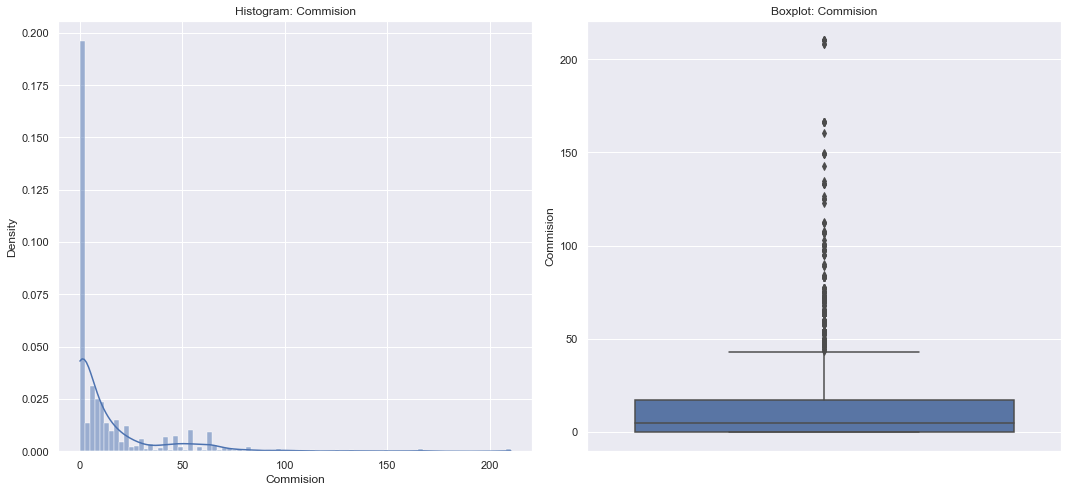

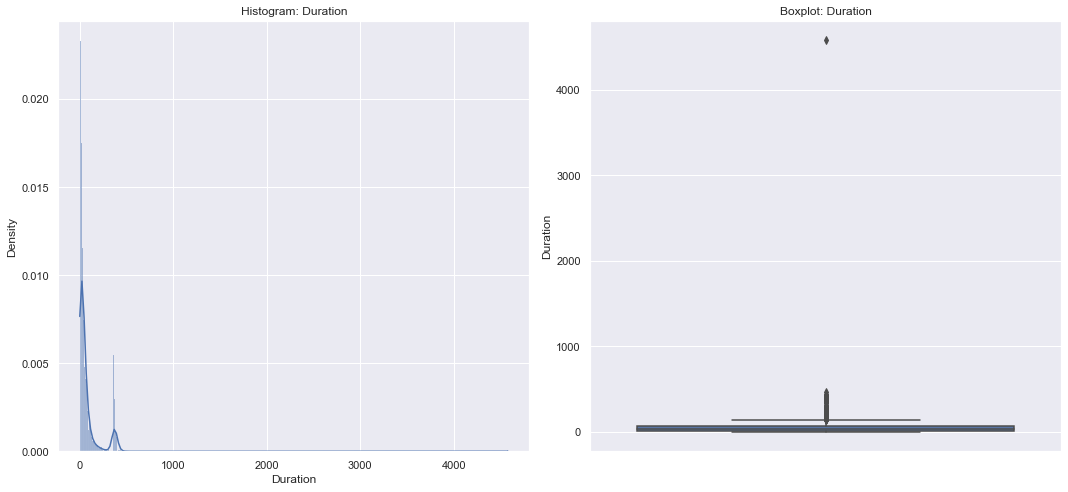

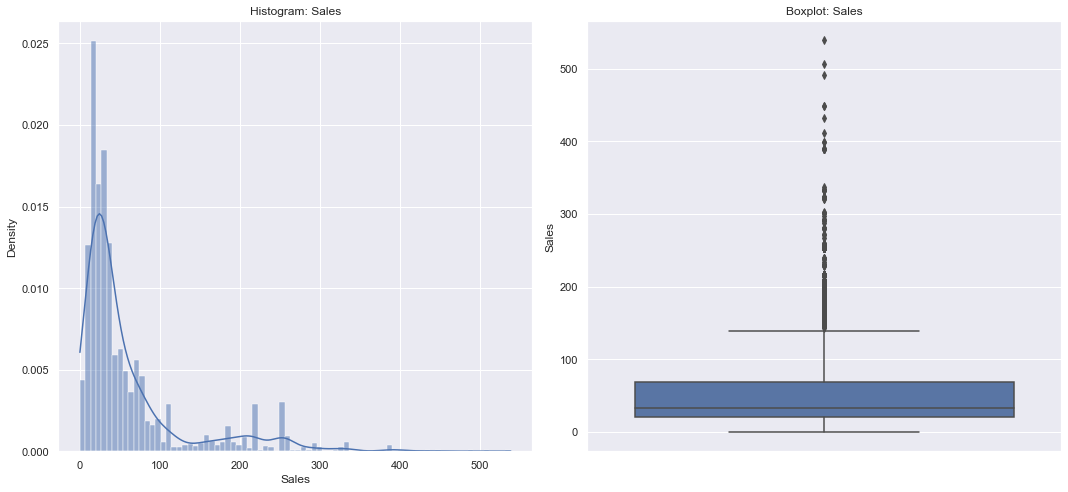

In [43]:
# histogram and boxplot of integer and float columns
for i in df.columns:
    if df[i].dtype in ['int64','float64']:
        plt.figure(figsize = (15,7))
        print(i, ' : ', stats.shapiro(df[i]))
        plt.subplot(1,2,1)
        sns.histplot(x=df[i],kde=True,stat='density');
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=i,data=df);
        plt.title('Boxplot: {}'.format(i))                
        plt.tight_layout();

In [44]:
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':')
        print(df[i].value_counts())
        print('------------------','\n','\n')

Agency_Code :
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64
------------------ 
 

Type :
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64
------------------ 
 

Claimed :
No     2076
Yes     924
Name: Claimed, dtype: int64
------------------ 
 

Channel :
Online     2954
Offline      46
Name: Channel, dtype: int64
------------------ 
 

Product Name :
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64
------------------ 
 

Destination :
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64
------------------ 
 



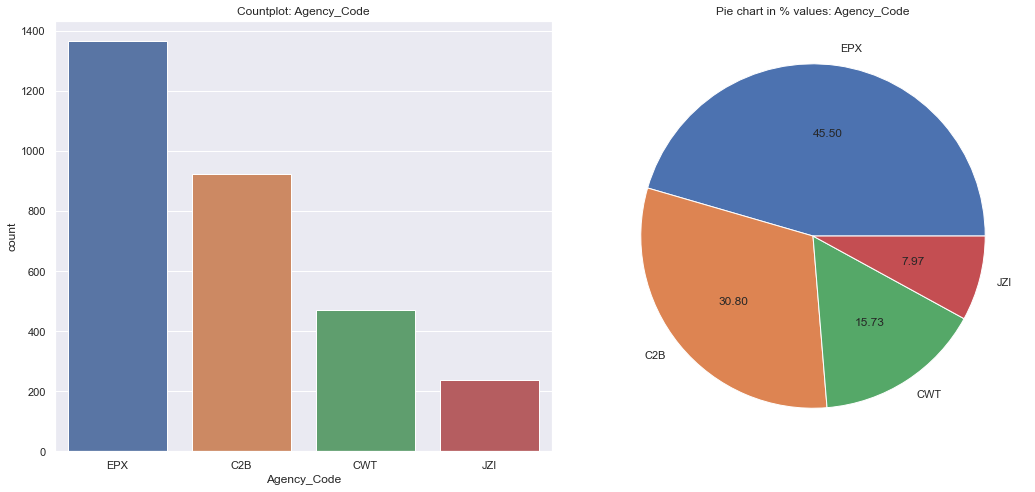

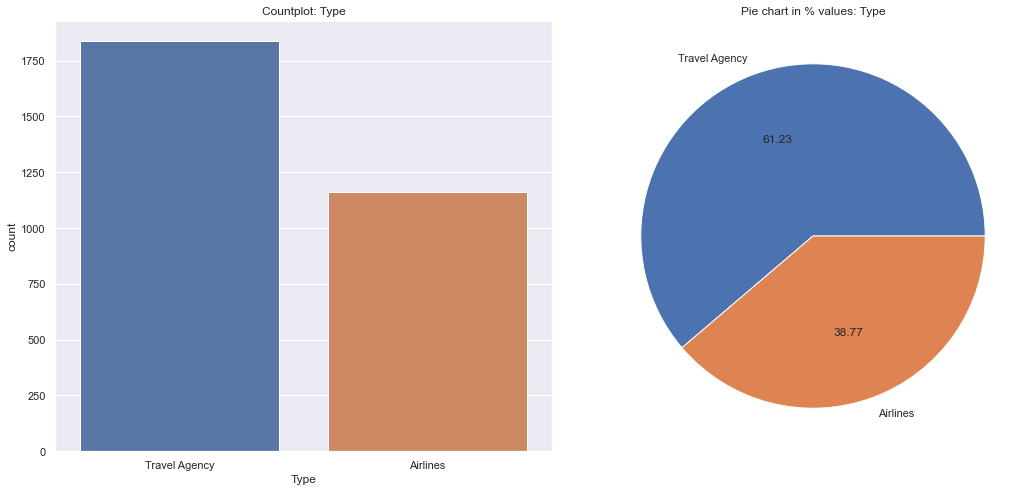

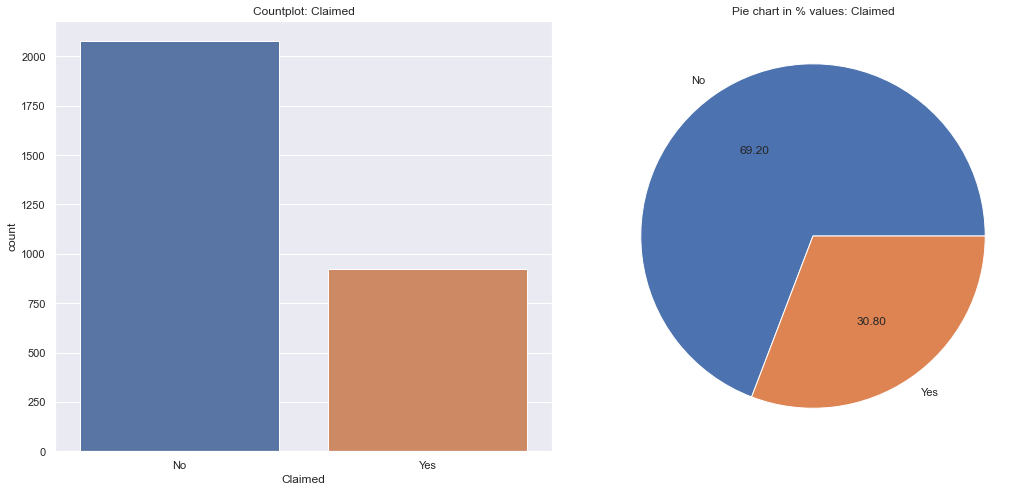

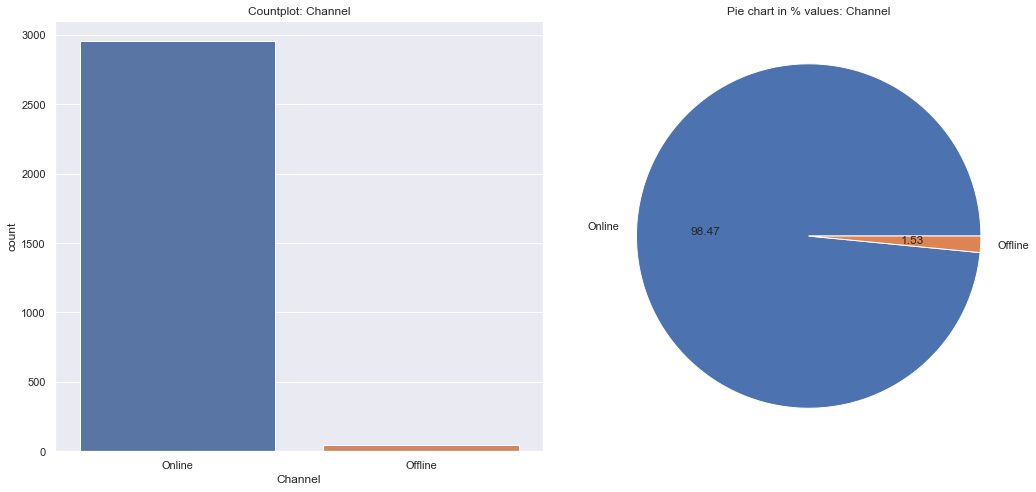

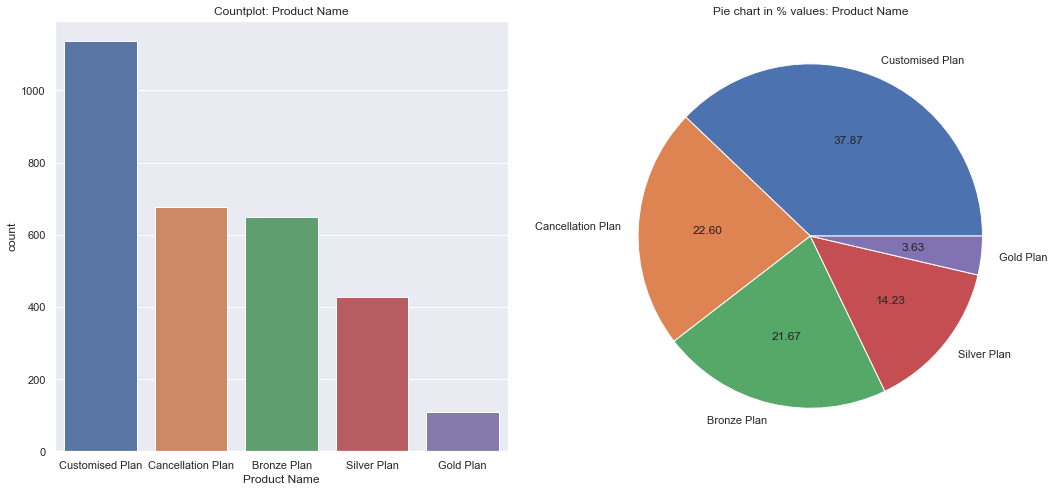

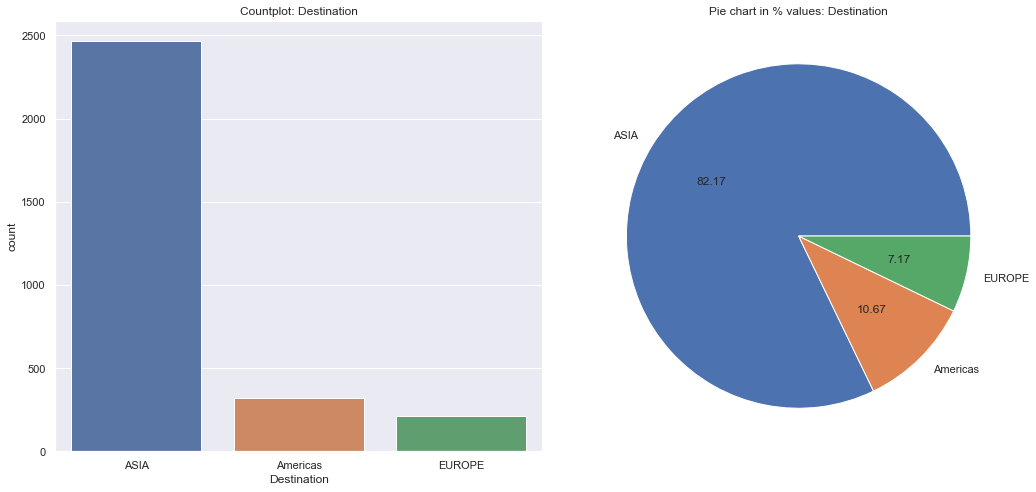

In [45]:
# countplot and piechart showing distribution of categories across the variable for object columns
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot: {}'.format(i));
        plt.subplot(1,2,2);
        plt.pie(x=df[i].value_counts(),labels = df[i].value_counts().index,autopct='%.2f')
        plt.title('Pie chart in % values: {}'.format(i))                
        plt.tight_layout();
        

In [46]:
# Find the records with Duration < 0
df[df['Duration'] <0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [47]:
# Find the mean duration of tour conducted by Agency - JZI, Product - Bronze Plan, Destination -ASIA.
# The abive observation has a sales value of 18, so lets consider the average duration for slae value betwen 15 and 20, for
# all the mentioned parameters
round(df[(df['Agency_Code'] == 'JZI') & (df['Product Name'] == 'Bronze Plan') & (df['Destination'] == 'ASIA') & 
                            (df['Sales'] > 15.0) & (df['Sales'] < 20.0)]['Duration'].mean())

12

In [48]:
# Impute the duration of -1, with value 12 as obtained above
df['Duration'].replace(-1,12,inplace=True)
df.loc[1508]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration                 12
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

In [49]:
# Get the updated data summary table with range IQR and quartile min, quartile max
df_desc = df.describe(include='all').T
df_desc['Range'] = df_desc['max'] - df_desc['min']
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc['Qmin'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - 1.5 * df_desc['IQR']))
df_desc['Qmax'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + 1.5 * df_desc['IQR']))
df_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0,76.0,10.0,17.0,57.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21,210.21,17.235,0.0,43.0875
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.005667,134.051227,0.0,11.0,26.5,63.0,4580.0,4580.0,52.0,0.0,141.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0,539.0,49.0,0.0,142.5
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bivariate Analysis

<Figure size 720x720 with 0 Axes>

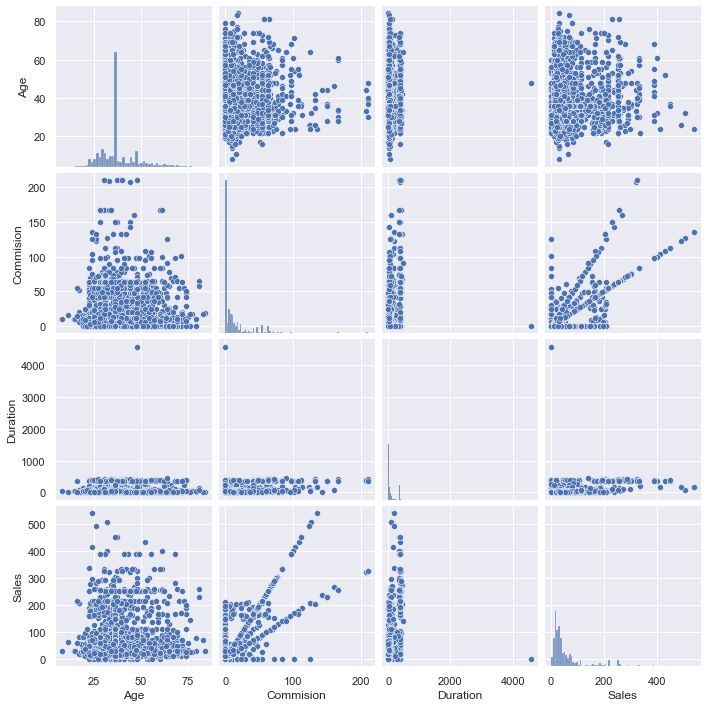

In [50]:
# Pairplot to see correlation between numeric variables.
plt.figure(figsize=(10,10));
sns.pairplot(df);

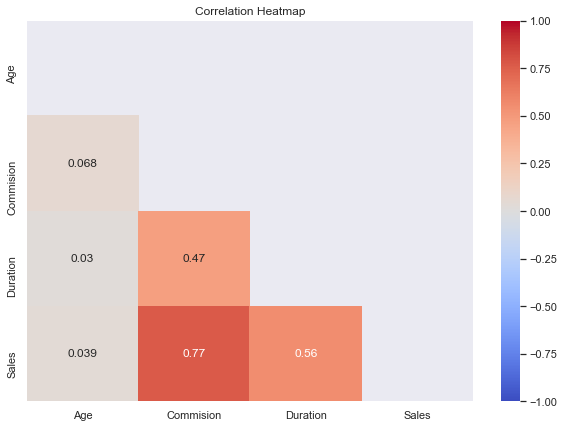

In [51]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

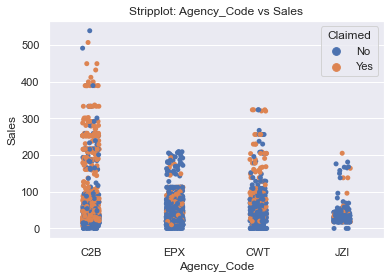

In [52]:
#Plot a stripplot of Agency_code against Sales with claim status as hue
sns.stripplot(data = df, x='Agency_Code',y='Sales',hue = 'Claimed' );
plt.title('Stripplot: Agency_Code vs Sales');

In [53]:
# Lets check the percentage of claims against Agency code
pd.crosstab(index=df['Agency_Code'],columns=df['Claimed'],normalize='index')

Claimed,No,Yes
Agency_Code,,
C2B,0.393939,0.606061
CWT,0.701271,0.298729
EPX,0.858608,0.141392
JZI,0.874477,0.125523


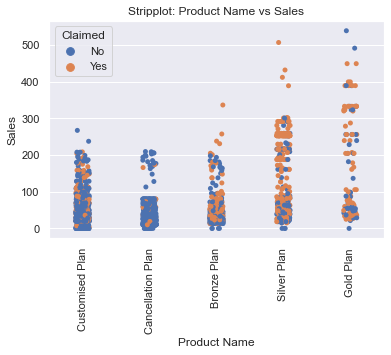

In [54]:
#Plot a stripplot of Product Name against Sales with claim status as hue
sns.stripplot(data = df, x='Product Name',y='Sales',hue = 'Claimed' );
plt.xticks(rotation = 90);
plt.title('Stripplot: Product Name vs Sales');

In [55]:
# Lets check the percentage of claims against Product Name
pd.crosstab(index=df['Product Name'],columns=df['Claimed'],normalize='index')

Claimed,No,Yes
Product Name,,
Bronze Plan,0.613846,0.386154
Cancellation Plan,0.936578,0.063422
Customised Plan,0.776408,0.223592
Gold Plan,0.357798,0.642202
Silver Plan,0.283372,0.716628


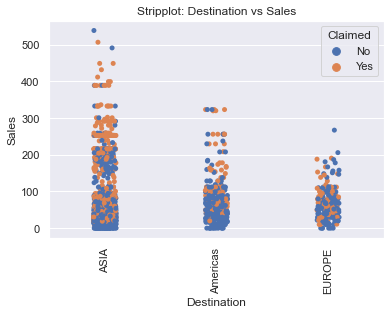

In [56]:
#Plot a stripplot of Product Name against Sales with claim status as hue
sns.stripplot(data = df, x='Destination',y='Sales',hue = 'Claimed' );
plt.xticks(rotation = 90);
plt.title('Stripplot: Destination vs Sales');

In [57]:
# Lets check the percentage of claims against Destination
pd.crosstab(index=df['Destination'],columns=df['Claimed'],normalize='index')

Claimed,No,Yes
Destination,,
ASIA,0.686004,0.313996
Americas,0.725000,0.275000
EUROPE,0.711628,0.288372


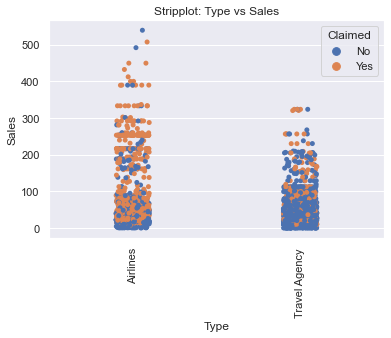

In [58]:
#Plot a stripplot of Product Name against Sales with claim status as hue
sns.stripplot(data = df, x='Type',y='Sales',hue = 'Claimed' );
plt.xticks(rotation = 90);
plt.title('Stripplot: Type vs Sales');

In [59]:
# Lets check the number of claims against Destination
pd.crosstab(index=df['Type'],columns=df['Claimed'])

Claimed,No,Yes
Type,,
Airlines,573,590
Travel Agency,1503,334


## 2.2	Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [60]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [61]:
# Convert the object variables to categorical codes
df_int = df.copy()
for i in df_int.columns: 
    if df_int[i].dtype == 'object': 
        print('Column:',i)
        print(pd.Categorical(df_int[i].unique()))
        print(pd.Categorical(df_int[i].unique()).codes)
        print('---------------------------------------')
        df_int[i] = pd.Categorical(df_int[i]).codes

Column: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]
---------------------------------------
Column: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]
---------------------------------------
Column: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]
---------------------------------------
Column: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]
---------------------------------------
Column: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]
---------------------------------------
Column: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]
---------------------------------------


In [62]:
# Copy the orig dataset into df_int and convert object variables in categorical codes.
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [63]:
# Split the dataset into test and train
X = df_int.drop('Claimed',axis = 1)
y = df_int.pop('Claimed')
X_train,X_test,train_labels,test_labels = train_test_split(X,y,test_size=0.30,random_state=123)

In [64]:
# Lets check the Claimed status in the train data.
print('Number of observations in train {}.'.format(train_labels.count()))
print(train_labels.value_counts())
print(train_labels.value_counts(normalize=True))

Number of observations in train 2100.
0    1444
1     656
Name: Claimed, dtype: int64
0    0.687619
1    0.312381
Name: Claimed, dtype: float64


In [65]:
# Lets check the Claimed status in the train data.
print('Number of observations in test {}.'.format(test_labels.count()))
print(test_labels.value_counts())
print(test_labels.value_counts(normalize=True))

Number of observations in test 900.
0    632
1    268
Name: Claimed, dtype: int64
0    0.702222
1    0.297778
Name: Claimed, dtype: float64


### CART Model

In [66]:
# We will implement CART model via Decision Tree classifier in sklearn library's cluster module.
# We have 2100 observations in training set. So we can have ~1% of 2100, 20 as min_samples_leaf and 3 times min_sample_leaf as 
# min_samples_split, i.e. 60. We will consider max_depth as 10. We will consider above values as the mid, and give values to 
# ends and check the best parameters. We will finetune the grid search further.

dtr_model = DecisionTreeClassifier(criterion='gini',random_state=123)

param_grid = { 'max_depth' : [5,10,15],
               'min_samples_leaf' : [10,20,30],
               'min_samples_split' : [30,60,90]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =10)

In [67]:
#Lets fit the above grid search model to the training dataset.
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 60, 90]})

In [68]:
# Lets check the best parameters identified by GridSearch
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 60}

In [69]:
# Lets fine tune the gridsearch with above central values.
param_grid = { 'max_depth' : [4,5,6],
               'min_samples_leaf' : [8,10,12],
               'min_samples_split' : [40,60,80]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 40}

In [70]:
# Lets fine tune the gridsearch with above central values.
param_grid = { 'max_depth' : [3,4,5],
               'min_samples_leaf' : [11,12,13],
               'min_samples_split' : [35,40,45]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 40}

In [71]:
# Lets fine tune the gridsearch with above central values.
param_grid = { 'max_depth' : [3,4,5],
               'min_samples_leaf' : [10,11,12],
               'min_samples_split' : [38,40,42]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 40}

In [72]:
# Lets fine tune the gridsearch with above central values.
param_grid = { 'max_depth' : [4,5,6],
               'min_samples_leaf' : [9,10,11],
               'min_samples_split' : [39,40,41]
                }

grid_search = GridSearchCV(estimator = dtr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 40}

In [73]:
# The parameters are fine tuned, lets store the best parameter into cart_model
cart_model = grid_search.best_estimator_
cart_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=11, min_samples_split=40,
                       random_state=123)

In [74]:
# Lets look at the feature importance as per the CART model
pd.DataFrame(cart_model.feature_importances_,index=X_train.columns, columns=['Imp']).sort_values('Imp',ascending=False)

,Imp
Agency_Code,0.543441
Sales,0.229275
Product Name,0.094202
Duration,0.046321
Commision,0.042336
Age,0.028968
Channel,0.015458
Type,0.000000
Destination,0.000000


### Random Forest

In [75]:
# We will implement Random Forest classifier model via RandomForestClassifier in sklearn library's ensemble module.
# We have 2100 observations in training set. So we can have ~1% of 2100, 20 as min_samples_leaf and 3 times min_sample_leaf as 
# min_samples_split, i.e. 60. We will consider max_depth as 10. We will consider above values as the mid, and give values to 
# ends and check the best parameters. We will finetune the grid search further. Lets set cross validation to 3, as random forest
# will take considerable time to run. Default value of n_estimators is 100, we will try to check for 201 and 301 to see if it 
# works better for this dataset.

rfcl = RandomForestClassifier(random_state = 123)

param_grid = { 'n_estimators' : [101,201,301],
               'max_depth' : [10,15],
               'max_features' : [4,5],
               'min_samples_leaf' : [20,30],
               'min_samples_split' : [60,90]
                }
grid_search = GridSearchCV(estimator = rfcl,param_grid=param_grid,cv =3)

In [76]:
# Lets fit the grid search on the training data
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [10, 15], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [60, 90],
                         'n_estimators': [101, 201, 301]})

In [77]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 201}

In [78]:
# Lets fine tune the hyperparameters by experimenting with above best parameters and values near to these
param_grid = { 'n_estimators' : [150,201,250],
               'max_depth' : [8,10,12],
               'max_features' : [3,4],
               'min_samples_leaf' : [15,20],
               'min_samples_split' : [45,60]
                }
grid_search = GridSearchCV(estimator = rfcl,param_grid=param_grid,cv =3)
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [3, 4],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [45, 60],
                         'n_estimators': [150, 201, 250]})

In [79]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 201}

In [80]:
# Lets fine tune the hyperparameters by experimenting with above best parameters and values near to these
param_grid = { 'n_estimators' : [180,201,220],
               'max_depth' : [9,10,11],
               'max_features' : [3,4],
               'min_samples_leaf' : [19,20,21],
               'min_samples_split' : [57,60,63]
                }
grid_search = GridSearchCV(estimator = rfcl,param_grid=param_grid,cv =3)
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [9, 10, 11], 'max_features': [3, 4],
                         'min_samples_leaf': [19, 20, 21],
                         'min_samples_split': [57, 60, 63],
                         'n_estimators': [180, 201, 220]})

In [81]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 201}

In [82]:
# The parameters are fine tuned, lets store the best parameter into rfcl_model
rfcl_model = grid_search.best_estimator_
rfcl_model

RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=20,
                       min_samples_split=60, n_estimators=201,
                       random_state=123)

In [83]:
# Lets look at the feature importance as per the Random Forest Classifier model
pd.DataFrame(rfcl_model.feature_importances_,index=X_train.columns, columns=['Imp']).sort_values('Imp',ascending=False)

,Imp
Agency_Code,0.302083
Product Name,0.239823
Sales,0.170215
Duration,0.095676
Commision,0.089450
Type,0.046335
Age,0.043511
Destination,0.012448
Channel,0.000460


### Artificial Neural Network

In [84]:
# We need to scale the training and test data before applying MLP classifier
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [85]:
# We will implement Artificial Neural Network(ANN) model via MLPClassifier in sklearn library's neural_network module.
# Default hidden layer size is 100, so we will also give value 50 to see how the grid search evaluates.
# Default activation is 'relu', we will also use 'logistic' to see which helps in converging the model against training dataset 
#faster. We will evaluate both sgd and adam for gradient based optimisation. default tolerance is 0.0001, 
#we will also try for 0.001


mlp = MLPClassifier(random_state=123)

param_grid = { 'hidden_layer_sizes' : [50,100],
               'activation' : ['logistic','relu'],
               'solver' : ['sgd','adam'],
               'tol' : [0.0001,0.001],
               'max_iter' : [2000,3000,4000]
                }

grid_search = GridSearchCV(estimator = mlp,param_grid=param_grid,cv =3)

In [86]:
grid_search.fit(X_trains,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [50, 100],
                         'max_iter': [2000, 3000, 4000],
                         'solver': ['sgd', 'adam'], 'tol': [0.0001, 0.001]})

In [87]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 50,
 'max_iter': 2000,
 'solver': 'adam',
 'tol': 0.0001}

In [88]:
# Lets fine tune the hyperparameters by experimenting with above best parameters and values near to these
param_grid = { 'hidden_layer_sizes' : [40,50,60],
               'activation' : ['relu'],
               'solver' : ['adam'],
               'tol' : [0.0001],
               'max_iter' : [1500,2000,2500]
                }

grid_search = GridSearchCV(estimator = mlp,param_grid=param_grid,cv =3)
grid_search.fit(X_trains,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [40, 50, 60],
                         'max_iter': [1500, 2000, 2500], 'solver': ['adam'],
                         'tol': [0.0001]})

In [89]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 50,
 'max_iter': 1500,
 'solver': 'adam',
 'tol': 0.0001}

In [90]:
# Lets fine tune the hyperparameters by experimenting with above best parameters and values near to these
param_grid = { 'hidden_layer_sizes' : [45,50,55],
               'activation' : ['relu'],
               'solver' : ['adam'],
               'tol' : [0.0001,0.00001],
               'max_iter' : [1400,1500,1600]
                }

grid_search = GridSearchCV(estimator = mlp,param_grid=param_grid,cv =3)
grid_search.fit(X_trains,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [45, 50, 55],
                         'max_iter': [1400, 1500, 1600], 'solver': ['adam'],
                         'tol': [0.0001, 1e-05]})

In [91]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 50,
 'max_iter': 1400,
 'solver': 'adam',
 'tol': 0.0001}

In [92]:
# Lets fine tune the hyperparameters by experimenting with above best parameters and values near to these
param_grid = { 'hidden_layer_sizes' : [50],
               'activation' : ['relu'],
               'solver' : ['adam'],
               'tol' : [0.0001],
               'max_iter' : [1400,1300,1200]
                }

grid_search = GridSearchCV(estimator = mlp,param_grid=param_grid,cv =3)
grid_search.fit(X_trains,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [50],
                         'max_iter': [1400, 1300, 1200], 'solver': ['adam'],
                         'tol': [0.0001]})

In [93]:
# Lets check the best parameters retieved by grid search
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 50,
 'max_iter': 1400,
 'solver': 'adam',
 'tol': 0.0001}

In [94]:
# The parameters are fine tuned, lets store the best parameter into ann_model
ann_model = grid_search.best_estimator_
ann_model

MLPClassifier(hidden_layer_sizes=50, max_iter=1400, random_state=123)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### CART Performance metrics

In [95]:
# Lets first perform the prediction with cartmodel for training and test data
cart_train_predict = cart_model.predict(X_train)
cart_test_predict = cart_model.predict(X_test)

In [96]:
# Lets check the accuracy of training data
print(cart_model.score(X_train,train_labels))

0.79


In [97]:
# Let us check the confusion matrix for training data
print(pd.DataFrame(confusion_matrix(train_labels,cart_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                1274                 170
Actual Positive                 271                 385


0.8358044853388285


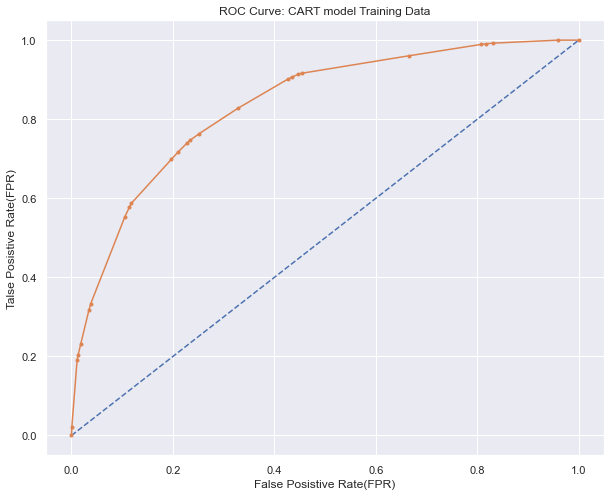

In [98]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(train_labels,cart_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: CART model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(train_labels,cart_model.predict_proba(X_train)[:,1]))

In [99]:
# Lets check the classification report for CART model on training data
print(classification_report(train_labels,cart_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1444
           1       0.69      0.59      0.64       656

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [100]:
# Store the classification report of training data for Cart Model into a dataframe
cart_train_report = round(pd.DataFrame(classification_report(train_labels,cart_train_predict,output_dict=True)),3)
cart_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.825,0.694,0.79,0.759,0.784
recall,0.882,0.587,0.79,0.735,0.790
f1-score,0.852,0.636,0.79,0.744,0.785
support,1444.000,656.000,0.79,2100.000,2100.000


In [101]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
cart_train_metrics = [cart_train_report.iloc[0,2], #accuracy
                      cart_train_report.iloc[0,1], # precision of claimed
                      cart_train_report.iloc[1,1], # recall of claimed
                      cart_train_report.iloc[2,1], # f1-score of claimed
                      round(roc_auc_score(train_labels,cart_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
cart_train_metrics

[0.79, 0.694, 0.587, 0.636, 0.836]

In [102]:
# Lets check the accuracy of testing data
print(cart_model.score(X_test,test_labels))

0.7955555555555556


In [103]:
# Let us check the confusion matrix for testing data
print(pd.DataFrame(confusion_matrix(test_labels,cart_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 558                  74
Actual Positive                 110                 158


0.8196645333459286


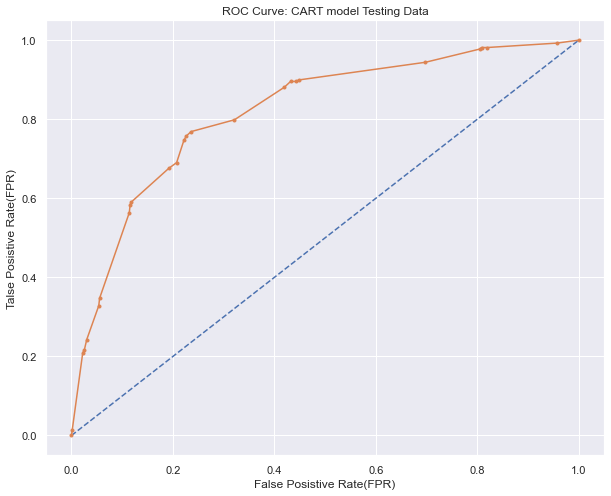

In [104]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(test_labels,cart_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: CART model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(test_labels,cart_model.predict_proba(X_test)[:,1]))

In [105]:
# Lets check the classification report for CART model on testing data
print(classification_report(test_labels,cart_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       632
           1       0.68      0.59      0.63       268

    accuracy                           0.80       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



In [106]:
# Store the classification report of testing data for Cart Model into a dataframe
cart_test_report = round(pd.DataFrame(classification_report(test_labels,cart_test_predict,output_dict=True)),3)
cart_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.835,0.681,0.796,0.758,0.789
recall,0.883,0.590,0.796,0.736,0.796
f1-score,0.858,0.632,0.796,0.745,0.791
support,632.000,268.000,0.796,900.000,900.000


In [107]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
cart_test_metrics = [cart_test_report.iloc[0,2], #accuracy
                     cart_test_report.iloc[0,1], # precision of claimed
                     cart_test_report.iloc[1,1], # recall of claimed
                     cart_test_report.iloc[2,1], # f1-score of claimed
                     round(roc_auc_score(test_labels,cart_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
cart_test_metrics

[0.796, 0.681, 0.59, 0.632, 0.82]

In [108]:
# Lets create a dataframe to compare test and training model metrics of CART model.
cart_metrics = pd.DataFrame(cart_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['CART_training'])
cart_metrics['CART_test'] = cart_test_metrics
cart_metrics

,CART_training,CART_test
accuracy,0.790,0.796
precision,0.694,0.681
recall,0.587,0.590
f1-score,0.636,0.632
roc_auc_score,0.836,0.820


### Random Forest Performance metrics

In [109]:
# Lets first perform the prediction with random forest for training and test data
rfcl_train_predict = rfcl_model.predict(X_train)
rfcl_test_predict = rfcl_model.predict(X_test)

In [110]:
# Lets check the accuracy of training data
print(rfcl_model.score(X_train,train_labels))

0.7947619047619048


In [111]:
# Let us check the confusion matrix for training data
print(pd.DataFrame(confusion_matrix(train_labels,rfcl_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                1296                 148
Actual Positive                 283                 373


0.8505733354165259


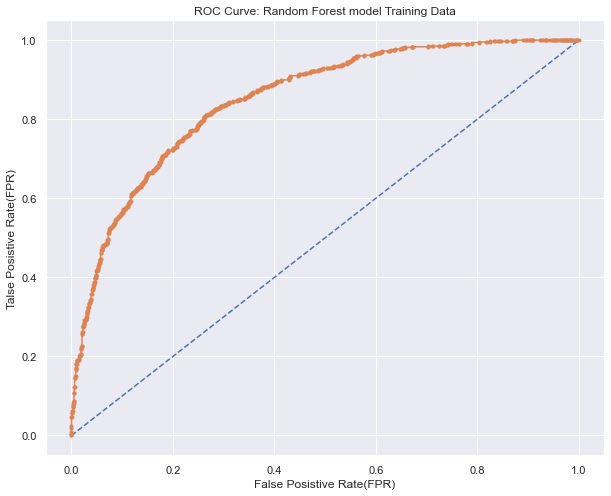

In [112]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(train_labels,rfcl_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Random Forest model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(train_labels,rfcl_model.predict_proba(X_train)[:,1]))

In [113]:
# Lets check the classification report for Random Forest model on training data
print(classification_report(train_labels,rfcl_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1444
           1       0.72      0.57      0.63       656

    accuracy                           0.79      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [114]:
# Store the classification report of training data for random Forest Model into a dataframe
rfcl_train_report = round(pd.DataFrame(classification_report(train_labels,rfcl_train_predict,output_dict=True)),3)
rfcl_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.821,0.716,0.795,0.768,0.788
recall,0.898,0.569,0.795,0.733,0.795
f1-score,0.857,0.634,0.795,0.746,0.788
support,1444.000,656.000,0.795,2100.000,2100.000


In [115]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
rfcl_train_metrics = [rfcl_train_report.iloc[0,2], #accuracy
                      rfcl_train_report.iloc[0,1], # precision of claimed
                      rfcl_train_report.iloc[1,1], # recall of claimed
                      rfcl_train_report.iloc[2,1], # f1-score of claimed
                      round(roc_auc_score(train_labels,rfcl_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
rfcl_train_metrics

[0.795, 0.716, 0.569, 0.634, 0.851]

In [116]:
# Lets check the accuracy of testing data
print(rfcl_model.score(X_test,test_labels))

0.7977777777777778


In [117]:
# Let us check the confusion matrix for testing data
print(pd.DataFrame(confusion_matrix(test_labels,rfcl_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 559                  73
Actual Positive                 109                 159


0.835419421877952


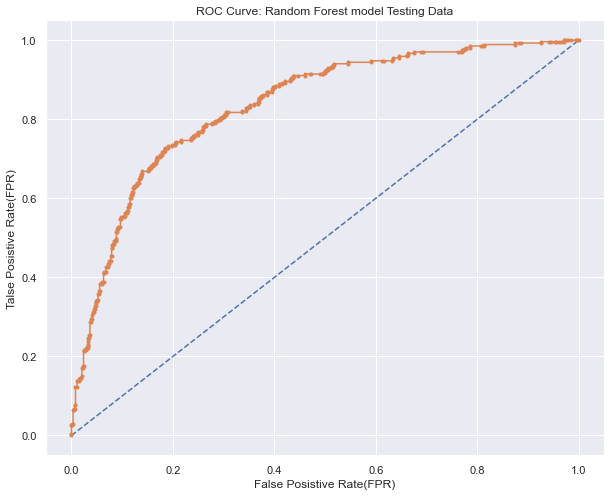

In [118]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(test_labels,rfcl_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Random Forest model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(test_labels,rfcl_model.predict_proba(X_test)[:,1]))

In [119]:
# Lets check the classification report for Random Forest model on testing data
print(classification_report(test_labels,rfcl_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       632
           1       0.69      0.59      0.64       268

    accuracy                           0.80       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



In [120]:
# Store the classification report of testing data for Random Forest Model into a dataframe
rfcl_test_report = round(pd.DataFrame(classification_report(test_labels,rfcl_test_predict,output_dict=True)),3)
rfcl_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.837,0.685,0.798,0.761,0.792
recall,0.884,0.593,0.798,0.739,0.798
f1-score,0.860,0.636,0.798,0.748,0.793
support,632.000,268.000,0.798,900.000,900.000


In [121]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
rfcl_test_metrics = [rfcl_test_report.iloc[0,2], #accuracy
                     rfcl_test_report.iloc[0,1], # precision of claimed
                     rfcl_test_report.iloc[1,1], # recall of claimed
                     rfcl_test_report.iloc[2,1], # f1-score of claimed
                     round(roc_auc_score(test_labels,rfcl_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
rfcl_test_metrics

[0.798, 0.685, 0.593, 0.636, 0.835]

In [122]:
# Lets create a dataframe to compare test and training model metrics of RF model.
rfcl_metrics = pd.DataFrame(rfcl_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['RF_training'])
rfcl_metrics['RF_test'] = rfcl_test_metrics
rfcl_metrics

,RF_training,RF_test
accuracy,0.795,0.798
precision,0.716,0.685
recall,0.569,0.593
f1-score,0.634,0.636
roc_auc_score,0.851,0.835


### Artificial Neural Network (ANN) Performance metrics

In [123]:
# Lets first perform the prediction with ANN for training and test data
ann_train_predict = ann_model.predict(X_trains)
ann_test_predict = ann_model.predict(X_tests)

In [124]:
# Lets check the accuracy of training data
print(ann_model.score(X_trains,train_labels))

0.7942857142857143


In [125]:
# Let us check the confusion matrix for training data
print(pd.DataFrame(confusion_matrix(train_labels,ann_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                1300                 144
Actual Positive                 288                 368


0.843786948516992


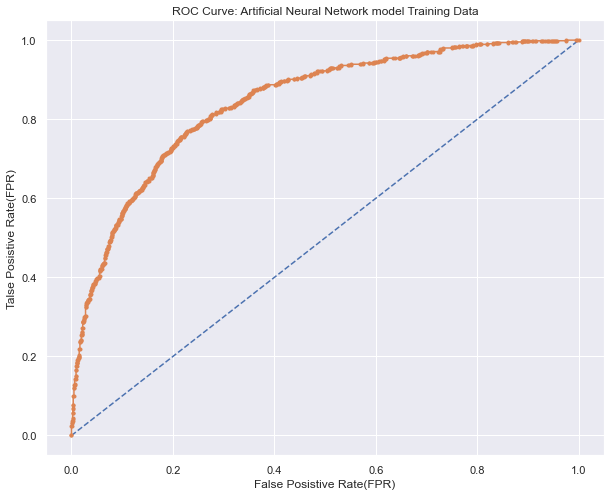

In [126]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(train_labels,ann_model.predict_proba(X_trains)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Artificial Neural Network model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(train_labels,ann_model.predict_proba(X_trains)[:,1]))

In [127]:
# Lets check the classification report for ANN model on training data
print(classification_report(train_labels,ann_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1444
           1       0.72      0.56      0.63       656

    accuracy                           0.79      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [128]:
# Store the classification report of training data for ANN Model into a dataframe
ann_train_report = round(pd.DataFrame(classification_report(train_labels,ann_train_predict,output_dict=True)),3)
ann_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.819,0.719,0.794,0.769,0.787
recall,0.900,0.561,0.794,0.731,0.794
f1-score,0.858,0.630,0.794,0.744,0.786
support,1444.000,656.000,0.794,2100.000,2100.000


In [129]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
ann_train_metrics = [ann_train_report.iloc[0,2], #accuracy
                     ann_train_report.iloc[0,1], # precision of claimed
                     ann_train_report.iloc[1,1], # recall of claimed
                     ann_train_report.iloc[2,1], # f1-score of claimed
                     round(roc_auc_score(train_labels,ann_model.predict_proba(X_trains)[:,1]),3)] # roc_auc_score
ann_train_metrics

[0.794, 0.719, 0.561, 0.63, 0.844]

In [130]:
# Lets check the accuracy of testing data
print(ann_model.score(X_tests,test_labels))

0.7822222222222223


In [131]:
# Let us check the confusion matrix for testing data
print(pd.DataFrame(confusion_matrix(test_labels,ann_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Observed Negative','Observed Positive']))

                 Observed Negative  Observed Positive
Actual Negative                559                 73
Actual Positive                123                145


0.8309707396561495


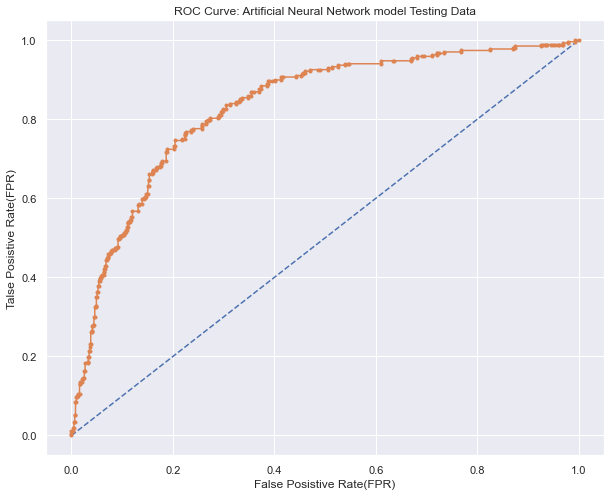

In [132]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(test_labels,ann_model.predict_proba(X_tests)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Artificial Neural Network model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print(roc_auc_score(test_labels,ann_model.predict_proba(X_tests)[:,1]))

In [133]:
# Lets check the classification report for ANN model on testing data
print(classification_report(test_labels,ann_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       632
           1       0.67      0.54      0.60       268

    accuracy                           0.78       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.77      0.78      0.78       900



In [134]:
# Store the classification report of testing data for ANN Model into a dataframe
ann_test_report = round(pd.DataFrame(classification_report(test_labels,ann_test_predict,output_dict=True)),3)
ann_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.820,0.665,0.782,0.742,0.774
recall,0.884,0.541,0.782,0.713,0.782
f1-score,0.851,0.597,0.782,0.724,0.775
support,632.000,268.000,0.782,900.000,900.000


In [135]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
ann_test_metrics = [ann_test_report.iloc[0,2], #accuracy
                    ann_test_report.iloc[0,1], # precision of claimed
                    ann_test_report.iloc[1,1], # recall of claimed
                    ann_test_report.iloc[2,1], # f1-score of claimed
                    round(roc_auc_score(test_labels,ann_model.predict_proba(X_tests)[:,1]),3)] # roc_auc_score
ann_test_metrics

[0.782, 0.665, 0.541, 0.597, 0.831]

In [136]:
# Lets create a dataframe to compare test and training model metrics of ANN model.
ann_metrics = pd.DataFrame(ann_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['ANN_training'])
ann_metrics['ANN_test'] = ann_test_metrics
ann_metrics

,ANN_training,ANN_test
accuracy,0.794,0.782
precision,0.719,0.665
recall,0.561,0.541
f1-score,0.630,0.597
roc_auc_score,0.844,0.831


##  2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [137]:
model_comparison = pd.concat([cart_metrics,rfcl_metrics,ann_metrics],axis = 1)
model_comparison

,CART_training,CART_test,RF_training,RF_test,ANN_training,ANN_test
accuracy,0.790,0.796,0.795,0.798,0.794,0.782
precision,0.694,0.681,0.716,0.685,0.719,0.665
recall,0.587,0.590,0.569,0.593,0.561,0.541
f1-score,0.636,0.632,0.634,0.636,0.630,0.597
roc_auc_score,0.836,0.820,0.851,0.835,0.844,0.831
